In [1]:
from fastai.tabular import *

In [2]:
path = 'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'
path

'C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/'

In [3]:
df = pd.read_csv(path + 'dataset_esquizotipia_final.csv')
df.head()

,CSI_RESPROBL,CSI_REESTCOGN,CSI_APOYOSOC,CSI_EVITPROBL,CSI_PENSDESID,CSI_RETISOC,CSI_AUTOCRIT,ANSIEDADRASGO,SCL90_IDEA_PARAN,CAPE_POSIT_FREC,TRAUMA_FRECUENCIA,SPQ_TOTAL_ESQUIZOT
0,17,5,0,7,5,13,2,20,0,24,4,0
1,13,11,3,6,11,17,11,17,1,22,9,0
2,20,20,20,11,8,3,0,20,1,30,12,1
3,12,1,0,4,6,3,1,18,0,20,4,0
4,8,9,17,4,14,2,6,27,17,35,17,2


In [4]:
procs = [FillMissing, Categorify, Normalize]

In [5]:
# se selecciona un 95% de los datos para entrenamiento y un 5% de los datos para validación
valid_idx  =  range ( len ( df ) - 14 ,  len ( df ))

In [6]:
# Se define la variable dependiente
dep_var  =  'SPQ_TOTAL_ESQUIZOT'

In [7]:
data = TabularDataBunch.from_df(path, df, dep_var, valid_idx=valid_idx, procs=procs)
print(data.train_ds.cont_names) # `cont_names` defaults to: set(df)-set(cat_names)-{dep_var}

['CSI_PENSDESID', 'ANSIEDADRASGO', 'CSI_AUTOCRIT', 'CSI_REESTCOGN', 'CSI_RESPROBL', 'CSI_APOYOSOC', 'TRAUMA_FRECUENCIA', 'SCL90_IDEA_PARAN', 'CSI_EVITPROBL', 'CAPE_POSIT_FREC', 'CSI_RETISOC']


In [8]:
(cat_x,cont_x),y = next(iter(data.train_dl))
for o in (cat_x, cont_x, y): print(to_np(o[:5]))

[0 0 0 0 0]
[[ 0.485693 -0.869802 -0.190096 -0.585335 ... -0.703721  0.551362 -0.763979  0.645153]
 [-1.021249 -0.409518  0.165272  0.724275 ... -0.703721  0.107005 -0.456124 -0.626453]
 [-1.356125  0.817908 -1.256199 -0.211161 ... -0.898642  0.107005  0.62137   0.433218]
 [-0.016621 -0.409518 -0.723147  1.472624 ... -0.898642  1.217898 -0.302196 -1.050321]
 [ 1.322883  1.891905  0.342956  1.472624 ...  0.855644  0.773541 -0.610051  2.55256 ]]
[0 0 0 0 0]


In [9]:
learn = tabular_learner(data, layers=[200,100], metrics=accuracy)
learn.fit(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.884249,0.921255,0.714286,04:27
1,0.779617,0.776371,0.714286,02:43
2,0.711922,0.689030,0.785714,02:38
3,0.657696,0.643411,0.785714,02:37
4,0.612069,0.622003,0.785714,02:31


CSI_PENSDESID,ANSIEDADRASGO,CSI_AUTOCRIT,CSI_REESTCOGN,CSI_RESPROBL,CSI_APOYOSOC,TRAUMA_FRECUENCIA,SCL90_IDEA_PARAN,CSI_EVITPROBL,CAPE_POSIT_FREC,CSI_RETISOC,target,prediction
-0.0166,-0.7164,0.1653,-0.9595,-0.0714,-0.2470,0.2974,-0.7037,-1.0039,-0.4561,-0.6265,0,0
0.4857,-0.1027,0.5206,-1.5208,-0.6656,-1.2861,-1.1850,-0.8986,-1.0039,-1.0718,0.6452,0,0
-2.0259,-0.8698,-1.2562,1.2855,1.5133,1.1384,2.0577,-0.8986,-0.5595,-0.9179,-0.6265,0,0
0.1508,-0.1027,0.3430,0.5372,0.1267,-0.5934,0.1121,-0.1190,0.5514,-0.3022,0.4332,1,0
-1.1887,0.2042,-0.7231,-0.2112,0.1267,1.1384,-0.2585,-0.5088,0.1070,-0.3022,-0.4145,0,0


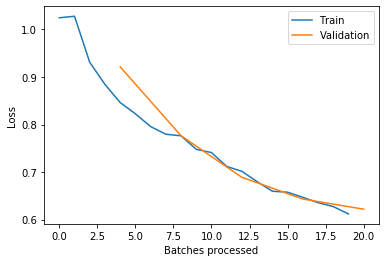

In [10]:
learn.recorder.plot_losses()
learn.show_results()

In [11]:
# el numero en el nombre es el porcentaje de precision, en este caso el porcentaje es 0.785714
learn.save("trained_model_785714", return_path=True)

WindowsPath('C:/Users/Jorge Mejia/Desktop/analisis_de_las_variables_de_la_esquizotipia_con_deep_learning/analisis_con_dataset_final/models/trained_model_785714.pth')